# Homework 4  
## Generalization error  
In Problems 1-3, we look at generalization bounds numerically. For $N > d_{VC}$, use the simple approximate bound $N^{d_{VC}}$ for the growth function $m_{\mathcal H}(N)$.
### Question 1  
For an $\mathcal H$ with $d_{VC} = 10$, if you want 95% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

Answer: We have that $\epsilon = 0.05$ and $\delta = 0.05$. Using the formula for the generalization bound and the simple approximate bound for the growth function we have
$$
N \geq \frac{8}{\epsilon^2}ln\bigg(\frac{4(2N)^{d_{VC}})}{\delta}\bigg) = \frac{8}{0.05^2}ln\bigg(\frac{4(2N)^{10})}{0.05}\bigg)
$$  

Let's vizualize the approximation

In [1]:
import numpy as np

N = 1000 # starting value of N
Napx = []
while True:
    Na = (8/(0.05**2))*np.log((4*((2*N)**10)/0.05))
    Napx.append(Na)
    if round(N,0) == round(Na,0):
        break
    N = Na

In [2]:
Napx

[257251.36393630301,
 434853.08159030857,
 451651.62731454166,
 452864.52062855061,
 452950.34023365,
 452956.40378480166,
 452956.83215921914,
 452956.8624225618]

In [3]:
numN = Napx[len(Napx)-1]

In [4]:
print('The closest numerical approximation of the sample size that the VC generalization bound predicts is: ', 
      min([400000, 420000, 440000, 460000, 480000], key=lambda x:abs(x-numN)),
     ' with N approximated to ', numN)

The closest numerical approximation of the sample size that the VC generalization bound predicts is:  460000  with N approximated to  452956.862423


The answer is (d).

### Question 2  
There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1-\delta$. Fix $d_vc = 50$ and $\delta = 0.05$ and plot these bounds as a function of $N$. Which bound is the smallest for very large N, say $N = 10,000$? Note that [c] and [d] are implicit bounds in $\epsilon$.  

Answer: First we need to simplify the bounds to get rid of the exponent in $N^{d_{VC}}$ then we plot and compute the value of the bound at $N=10000$. So we have,
- Original VC bound  
$$\epsilon \leq \sqrt{\frac{8}{N}\ln\bigg(\frac{4(2N^{d_{VC}})}{\delta}\bigg)} = \sqrt{\frac{8}{N}\bigg(ln\frac{4}{\delta} + d_{VC}ln(2N)\bigg)}$$

- Rademacher penalty bound
$$
\begin{align}
\epsilon &\leq \sqrt{\frac{2ln(2N(N^{d_{VC}}))}{N}} + \sqrt{\frac{2}{N}ln\frac{1}{\delta}} + \frac{1}{N} \\
&= \sqrt{\frac{2}{N}\bigg( ln(2N) + d_{VC}ln(N) \bigg)} + \sqrt{\frac{2}{N}ln\frac{1}{\delta}} + \frac{1}{N}
\end{align}
$$

- Parrondo and Van den Broek
$$
\epsilon \leq \sqrt{\frac{1}{N} \bigg( 2\epsilon + ln\frac{6(2N)^{d_{VC}}}{\delta} \bigg)} = \sqrt{\frac{1}{N} \bigg( 2\epsilon + ln\frac{6}{\delta} + d_{VC}ln(2N) \bigg)}
$$

- Devroye bound
$$
\epsilon \leq \sqrt{\frac{1}{2N}\bigg( 4\epsilon(1+\epsilon) + ln\frac{4N^{2d_{VC}}}{\delta} \bigg)} = 
\sqrt{\frac{1}{2N}\bigg( 4\epsilon(1+\epsilon) + ln\frac{4}{\delta} + 2d_{VC}ln(N)\bigg)}
$$

In [5]:
# INPUTS
delta = 0.05
dvc = 50

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Find epsilon iteratively for Parrondo and Van den Broek bound
epsilon = 1 # starting value of epsilon
epsapxPVB = []
N1=10000
while True:
    PVBb = np.sqrt((1/(N1))*(2*epsilon + np.log(6/delta) + dvc*np.log(2*N1)))
    epsapxPVB.append(PVBb)
    if round(epsilon,0) == round(PVBb,0):
        break
    epsilon = PVBb

print(epsapxPVB)

[0.22404505559587526, 0.22369844869394606]


In [7]:
# Find epsilon iteratively for Devroye bound
epsilon = 1 # starting value of epsilon
epsapxD = []
N1=10000
while True:
    Db = np.sqrt((1/(2*N1))*(4*epsilon*(1+epsilon) + np.log(4/delta) + 2*dvc*np.log(N1)))
    epsapxD.append(Db)
    if round(epsilon,0) == round(Db,0):
        break
    epsilon = Db

print(epsapxD)

[0.21603426392962441, 0.21522858593838984]


VCbound at N=10000 is  0.632174915201
RMbound at N=10000 is  0.331308785962
PVBbound at N=10000 is  0.22369829375
Dbound at N=10000 is  0.215228050165


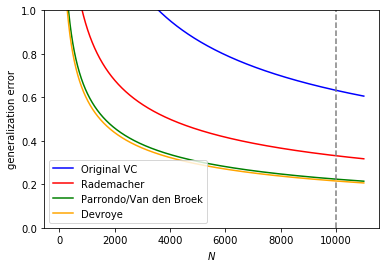

In [8]:
N = np.arange(1,11000,0.1)
N1 = 10000

# Original VC bound
VCbound = np.sqrt((8/N)*(np.log(4/delta) + dvc*np.log(2*N)))
VCbound1 = np.sqrt((8/N1)*(np.log(4/delta) + dvc*np.log(2*N1))) # at N=10000
print('VCbound at N=10000 is ', VCbound1)
plt.plot(N, VCbound, c='blue', label = 'Original VC')

# Rademacher penalty bound
RMbound = np.sqrt((2/N)*(np.log(2*N)+dvc*np.log(N))) + np.sqrt((2/N)*np.log(1/delta)) + 1/N
RMbound1 = np.sqrt((2/N1)*(np.log(2*N1)+dvc*np.log(N1))) + np.sqrt((2/N1)*np.log(1/delta)) + 1/N1
print('RMbound at N=10000 is ', RMbound1)
plt.plot(N, RMbound, c='red', label = 'Rademacher')

# Parrondo and Van den Broek -> need to solve iteratively
epsilonPVB = epsapxPVB[len(epsapxPVB)-1]
PVBbound = np.sqrt((1/(N))*(2*epsilonPVB + np.log(6/delta) + dvc*np.log(2*N)))
PVBbound1 = np.sqrt((1/(N1))*(2*epsilonPVB + np.log(6/delta) + dvc*np.log(2*N1)))
print('PVBbound at N=10000 is ', PVBbound1)
plt.plot(N, PVBbound, c='green', label = 'Parrondo/Van den Broek')


# Devroye bound -> need to solve iteratively (like Q1)
epsilonD = epsapxD[len(epsapxD)-1]
Dbound = np.sqrt((1/(2*N))*(4*epsilonD*(1+epsilonD) + np.log(4/delta) + 2*dvc*np.log(N)))
Dbound1 = np.sqrt((1/(2*N1))*(4*epsilonD*(1+epsilonD) + np.log(4/delta) + 2*dvc*np.log(N1)))
print('Dbound at N=10000 is ', Dbound1)
plt.plot(N, Dbound, c='orange', label = 'Devroye')


plt.legend()
plt.axvline(x=10000, c='grey', ls = '--')
plt.xlabel('$N$') # N samples
plt.ylabel('generalization error') # RHS of the inequality
plt.ylim(0,1) # put limits on the y-axis as defined by the problem
plt.show()

At $N=10000$ Devroye bound is the smallest.

### Question 3   
For the same values of $d_{VC}$ and $\delta$ of Problem 2, but for small $N$, say $N = 5$, which bound is the smallest?

In [9]:
# Find epsilon iteratively for Parrondo and Van den Broek bound
epsilon = 1 # starting value of epsilon
epsapxPVB1 = []
N1=5
while True:
    PVBb = np.sqrt((1/(N1))*(2*epsilon + np.log(6/delta) + dvc*np.log(2*N1)))
    epsapxPVB1.append(PVBb)
    if round(epsilon,0) == round(PVBb,0):
        break
    epsilon = PVBb

print(epsapxPVB1)

[4.9379499064385888, 5.0949513482537103]


In [10]:
# Find epsilon iteratively for Devroye bound
epsilon = 1 # starting value of epsilon
epsapxD1 = []
N1=5
while True:
    Db = np.sqrt((1/(2*N1))*(4*epsilon*(1+epsilon) + np.log(4/delta) + 2*dvc*np.log(N1)))
    epsapxD1.append(Db)
    if round(epsilon,0) == round(Db,0):
        break
    epsilon = Db

print(epsapxD1)

[4.1632417402558302, 5.0130740268855076, 5.3469782006453164]


VCbound at N=5 is  13.828161485
RMbound at N=5 is  7.04877656418
PVBbound at N=5 is  5.10111064552
Dbound at N=5 is  5.48702500626


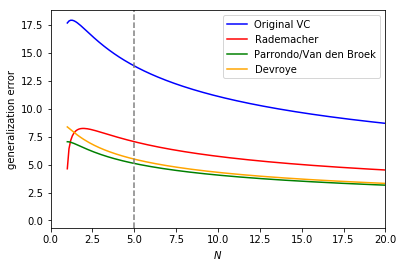

In [11]:
dvc = 50
delta = 0.05
N = np.arange(1,10000,0.1)
N1 = 5

# Original VC bound
VCbound = np.sqrt((8/N)*(np.log(4/delta) + dvc*np.log(2*N)))
VCbound1 = np.sqrt((8/N1)*(np.log(4/delta) + dvc*np.log(2*N1))) 
print('VCbound at N=5 is ', VCbound1)
plt.plot(N, VCbound, c='blue', label = 'Original VC')

# Rademacher penalty bound
RMbound = np.sqrt((2/N)*(np.log(2*N)+dvc*np.log(N))) + np.sqrt((2/N)*np.log(1/delta)) + 1/N
RMbound1 = np.sqrt((2/N1)*(np.log(2*N1)+dvc*np.log(N1))) + np.sqrt((2/N1)*np.log(1/delta)) + 1/N1
print('RMbound at N=5 is ', RMbound1)
plt.plot(N, RMbound, c='red', label = 'Rademacher')

# Parrondo and Van den Broek -> need to solve iteratively
epsilonPVB = epsapxPVB1[len(epsapxPVB1)-1]
PVBbound = np.sqrt((1/(N))*(2*epsilonPVB + np.log(6/delta) + dvc*np.log(2*N)))
PVBbound1 = np.sqrt((1/(N1))*(2*epsilonPVB + np.log(6/delta) + dvc*np.log(2*N1)))
print('PVBbound at N=5 is ', PVBbound1)
plt.plot(N, PVBbound, c='green', label = 'Parrondo/Van den Broek')


# Devroye bound -> need to solve iteratively (like Q1)
epsilonD = epsapxD1[len(epsapxD1)-1]
Dbound = np.sqrt((1/(2*N))*(4*epsilonD*(1+epsilonD) + np.log(4/delta) + 2*dvc*np.log(N)))
Dbound1 = np.sqrt((1/(2*N1))*(4*epsilonD*(1+epsilonD) + np.log(4/delta) + 2*dvc*np.log(N1)))
print('Dbound at N=5 is ', Dbound1)
plt.plot(N, Dbound, c='orange', label = 'Devroye')


plt.legend()
plt.axvline(x=5, c='grey', ls = '--')
plt.xlabel('$N$') # N samples
plt.ylabel('generalization error') # RHS of the inequality
plt.xlim(0,20)
plt.show()

At $N=5$ the Parrondo and Van den Broek bound is the smallest.

## Bias and Variance  
$\newcommand{\R}{\mathbb{R}}$
Consider the case where the target function $f : [-1; 1] \to \R$ is given by $f(x) = sin(\pi x)$ and the input probability distribution is uniform on $[-1; 1]$. Assume that the training set has only two examples (picked independently), and that the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.
### Question 4   
Assume the learning model consists of all hypotheses of the form $h(x) = ax$. What is the expected value, $g(x)$, of the hypothesis produced by the learning algorithm (expected value with respect to the data set)? Express your $\bar{g}(x)$ as $\widehat{a} x$, and round $\widehat{a} $ to two decimal digits only, then match exactly to one of the following answers.

**Hypothesis of the form $h(x)=ax$**

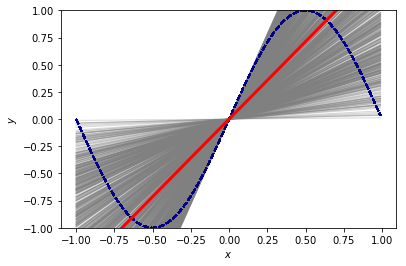

Expected value of the hypothesis produced by the learning algorithm is  1.43


In [12]:
# Inputs
no_trials = 1000
N = 2

h2_a = []
for i in range(no_trials):
    X = np.random.uniform(-1.,1., size=(N, 1))
    Y = np.sin(np.pi*X)
    a = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    h2_a.append(a)

    x = np.arange(-1.0, 1., 0.01)
    f = np.sin(np.pi*x)
    h2 = (x*a).T
    plt.plot(x,f, c='darkblue', ls = '--')
    #plt.scatter(X,Y, c='orange')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(x,h2, c='grey', ls = '-', linewidth=1.0, alpha = 0.3)
    plt.ylim(-1.,1.)

h2_a = np.array(h2_a)

plt.plot(x,np.mean(h2_a)*x, c='red', linewidth = 3.0)
plt.show()

print('Expected value of the hypothesis produced by the learning algorithm is ', 
      round(np.mean(h2_a),2))

 The red line in the above figure is $\bar g(x)$. As the answer does not *exactly* match any of the given solutions we can pick answer (e).

### Question 5
What is the closest value to the bias in this case?  

**Answer**: Recall that the bias is computed as $bias(x)=(\bar g(x)-f(x))^2$. Then for our $f(x)$ we have $bias(x) = (\widehat ax - f(x))^2$ where $\widehat a$ is the expected value of the parameter over all generated training sets in `no_trials`.

In [13]:
# Bias
h2_bias = np.mean((f-np.mean(h2_a)*x)**2)
print('Bias is ', round(h2_bias,2))
print('The closest value to the bias is ', 
      min([0.1, 0.3, 0.5, 0.7, 1.0], key=lambda x:abs(x-h2_bias)),
     ' with bias equal to ', h2_bias)

Bias is  0.27
The closest value to the bias is  0.3  with bias equal to  0.270204214599


Answer is (b).

### Question 6
What is the closest value to the variance in this case?  

**Answer**: Recall that variance is computed as 
$$
\begin{align}
var(x) &= E_{\mathcal D}[(g^{(\mathcal D)}(x)-\bar g(x))^2] \\
&= E_{\mathcal D}[(ax-\widehat ax)^2] \\
\end{align}
$$  

Using the computation from previous problem we just compute the variance of the estimated coefficients over all iterations.

In [14]:
# Variance
h2_var = np.mean(((h2_a-np.mean(h2_a))*x )**2)
print('The closest value to the variance is ', 
      min([0.2, 0.4, 0.6, 0.8, 1.0], key=lambda x:abs(x-h2_var)),
     ' with variance equal to ', h2_var)

The closest value to the variance is  0.2  with variance equal to  0.235393370211


To visualize the results we have the following plots of bias and variance.

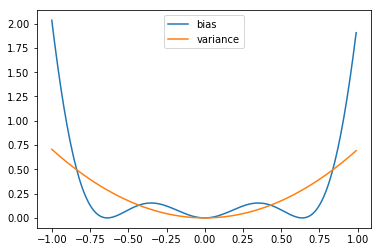

In [15]:
plt.plot(x,(f - np.mean(h2_a[:,0][:,0])*x)**2, label='bias')
plt.plot(x, np.var(h2_a[:,0][:,0])*(x**2), label = 'variance')
plt.legend()
plt.show()

Answer is (a).

### Question 7
Now, let's change $\mathcal H$. Which of the following learning models has the least expected value of out-of-sample error?

**Hypothesis of the form $h(x)=b$**

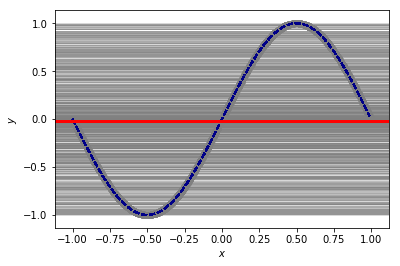

Bias is  0.5
Variance is  0.26
Expected value of out-of-sample error for h(x) = b is  0.76


In [16]:
no_trials = 1000
h1_all = []
for i in range(no_trials):
    N = 2
    X = np.random.uniform(-1.,1., size=(N, 1))
    Y = np.sin(np.pi*X)
    
    x = np.arange(-1.0, 1., 0.01)
    f = np.sin(np.pi*x)
    plt.plot(x,f, c='darkblue', ls = '--')
    plt.scatter(X, Y, c='grey')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

    h1 = (Y[0] + Y[1])/2
    h1_all.append(h1)
    plt.axhline(y=h1, c='grey', ls = '-', linewidth=1.0, alpha = 0.3)

plt.axhline(np.mean(h1_all), c='red', linewidth = 3.0)
plt.show()

# Bias and variance
gbar1 = np.mean(h1_all)
h1_bias = np.mean((gbar1-f)**2)
h1_var = np.var(h1_all)
print('Bias is ', round(h1_bias,2))
print('Variance is ', round(h1_var,2))
print('Expected value of out-of-sample error for h(x) = b is ', round(h1_bias+h1_var,2))

**Hypothesis of the form $h(x) = ax + b$**

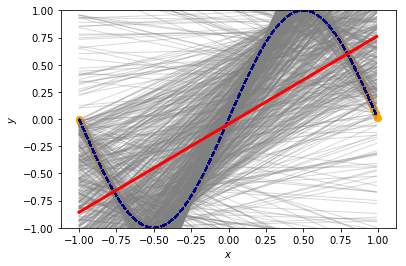

Bias is  0.21
Variance is  1.53


In [17]:
# Inputs
no_trials = 1000
N = 2

h3_a = []
for i in range(no_trials):
    X = np.column_stack((np.ones(N),np.random.uniform(-1.,1., size=(N, 1))))
    Y = np.sin(np.pi*X[:,1:])
    a = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    h3_a.append((a))

    x = np.arange(-1.0, 1., 0.01)
    f = np.sin(np.pi*x)
    h3 = (x*a[1]).T + a[0]
    plt.plot(x,f, c='darkblue', ls = '--')
    plt.scatter(X[:,1],Y, c='orange')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(x,h3, c='grey', ls = '-', linewidth=1.0, alpha = 0.3)
    plt.ylim(-1.,1.)

h3_a = np.array(h3_a)

plt.plot(x,np.mean(h3_a[:,1])*x+np.mean(h3_a[:,0]), c='red', linewidth = 3.0)
plt.show()

# Bias
h3_bias = np.mean((f-np.mean(h3_a[:,1])*x-np.mean(h3_a[:,0]))**2)
print('Bias is ', round(h3_bias,2))

# Variance
h3_var = np.mean(((h3_a[:,1]-np.mean(h3_a[:,1]))*x + h3_a[:,0] - np.mean(h3_a[:,0]))**2)
print('Variance is ', round(h3_var,2))

**Hypohesis of the form $h(x) = ax^2$**

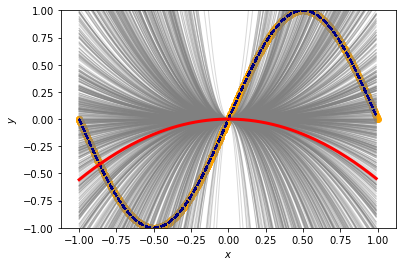

Bias is  0.56
Variance is  16.79


In [18]:
# Inputs
no_trials = 1000
N = 2

h4_a = []
for i in range(no_trials):
    Xx = np.random.uniform(-1.,1., size=(N, 1))
    X = Xx**2
    Y = np.sin(np.pi*Xx)
    a = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    h4_a.append((a))

    x = np.arange(-1.0, 1., 0.01)
    f = np.sin(np.pi*x)
    h4 = ((x**2)*a).T
    plt.plot(x,f, c='darkblue', ls = '--')
    plt.scatter(Xx,Y, c='orange')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(x,h4, c='grey', ls = '-', linewidth=1.0, alpha = 0.3)
    plt.ylim(-1.,1.)

h4_a = np.array(h4_a)

plt.plot(x,np.mean(h4_a)*(x**2), c='red', linewidth = 3.0)
plt.show()

# Bias
h4_bias = np.mean((f-np.mean(h4_a)*(x**2))**2)
print('Bias is ', round(h4_bias,2))

# Variance
h4_var = np.mean(((h4_a-np.mean(h4_a))*(x**2))**2)
print('Variance is ', round(h4_var,2))

**Hypothesis of the form $h(x) = ax^2 + b$**

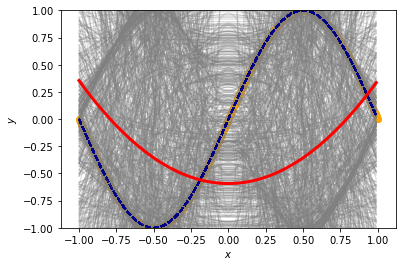

Bias is  0.66
Variance is  1097.03


In [19]:
# Inputs
no_trials = 1000
N = 2

h5_a = []
for i in range(no_trials):
    Xx = np.column_stack((np.ones(N),np.random.uniform(-1.,1., size=(N, 1))))
    X = Xx**2
    Y = np.sin(np.pi*Xx[:,1:])
    a = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    h5_a.append((a))

    x = np.arange(-1.0, 1., 0.01)
    f = np.sin(np.pi*x)
    h5 = ((x**2)*a[1]).T + a[0]
    plt.plot(x,f, c='darkblue', ls = '--')
    plt.scatter(Xx[:,1],Y, c='orange')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(x,h5, c='grey', ls = '-', linewidth=1.0, alpha = 0.3)
    plt.ylim(-1.,1.)

h5_a = np.array(h5_a)

plt.plot(x,np.mean(h5_a[:,1])*(x**2)+np.mean(h5_a[:,0]), c='red', linewidth = 3.0)
plt.show()

# Bias
h5_bias = np.mean((f-np.mean(h5_a[:,1])*(x**2)-np.mean(h5_a[:,0]))**2)
print('Bias is ', round(h5_bias,2))

# Variance
h5_var = np.mean(((h5_a[:,1]-np.mean(h5_a[:,1]))*(x**2) + h5_a[:,0] - np.mean(h5_a[:,0]))**2)
print('Variance is ', round(h5_var,2))

Combine all results

In [20]:
print('Expected value of out-of-sample error for h(x) = b is ', round(h1_bias+h1_var,2))
print('Expected value of out-of-sample error for h(x) = ax is ', round(h2_bias+h2_var,2))
print('Expected value of out-of-sample error for h(x) = ax+b is ', round(h3_bias+h3_var,2))
print('Expected value of out-of-sample error for h(x) = ax^2 is ', round(h4_bias+h4_var,2))
print('Expected value of out-of-sample error for h(x) = ax^2+b is ', round(h5_bias+h5_var,2))

Expected value of out-of-sample error for h(x) = b is  0.76
Expected value of out-of-sample error for h(x) = ax is  0.51
Expected value of out-of-sample error for h(x) = ax+b is  1.73
Expected value of out-of-sample error for h(x) = ax^2 is  17.35
Expected value of out-of-sample error for h(x) = ax^2+b is  1097.68


The least expected value of out-of-sample error has the hypothesis $h(x)=ax$ with the error at 0.5.  
Answer is (b).

## VC Dimension
### Question 8
Assume $q \geq 1$ is an integer and let $m_{\mathcal H}(1) = 2$. What is the VC dimension of a hypothesis set whose growth function satisfies: $m_{\mathcal H}(N+1) = 2m_{\mathcal H}(N)-{N \choose q}$?  
Recall that ${M \choose m}=0$ when $m > M$.

**Answer**: Using the given growth function and trying out some values of $q$ we have
![title](HW4_P8.png)
The highlighted values of $q$ give the last value of N which can be shattered, as after that value the growth function "stops growing".
Hence, we can conclude that the VC dimension is $q$ i.e. the answer is (c). 

### Question 9
For hypothesis sets $\mathcal H_1,\mathcal H_2, ...,\mathcal H_K$ with finite, positive VC dimensions $d_{VC}(\mathcal H_k)$ (same input space $\mathcal X$), some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the intersection of the sets: $d_{VC}(\bigcap^{K}_{k=1}\mathcal H_k)$?
(The VC dimension of an empty set or a singleton set is taken as zero)

### Question 10
For hypothesis sets $\mathcal H_1,\mathcal H_2, ...,\mathcal H_K$ with finite, positive VC dimensions $d_{VC}(\mathcal H_k)$ (same input space $\mathcal X$), some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the union of the sets:  
$d_{VC}(\bigcup^{K}_{k=1}\mathcal H_k)$?